In [6]:
# %pip install hvplot # descomentar para instalar
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import hvplot.xarray
%config InlineBackend.figure_format='retina' # mejor calidad en los plots

# Xarray

Xarray, datos etiquetados y multidimensionalidad.
- Domain agnostic
- Dimensions
- Metadata
- Open source

<img src="images/xarray.png" width="1024" height="512">


## Data structures

<img src="images/data_structures.png"  width="1280" height="300">

**Data array** guarda variables individuales multi-dimensionales, sus coordenadas y metadata.

**Data set** guarda múltiples variables (que potencialmente comparten las mismas coordenadas).


## DataArray 📗

array de datos multidimensional con: 
- **Nombre** del array
- **Dimensiones** label que le doy a mis DataArrays
- **Coordenadas** valores asociados a mis dimensiones
- **Atributos** diccionario donde guardar metadata

<img src="images/tag.png">

##### Ejemplo

In [7]:
da = xr.DataArray(
    data = np.array([[["hola"],["adios"]],[["perro"],["gato"]],[["día"],["noche"]]]), 
    dims = ["mi_lista","pares","palabra"],
    coords = {
        "mi_lista": ["saludos", "animales", "cielo"],
        "pares": list(range(1, 3)),
        "palabra": [0],
    },
    name = "ejemplo",
    attrs={"fuente" : "de los deseos"}
)

|"mi_lista" | "saludos"         |  "animales"          |  "cielo"            |
|--------|----------------------|----------------------|---------------------|
|        | [["hola"],["adios"]] | [["perro"],["gato"]] | [["día"],["noche"]] |

|"pares" | 1                    |  2                   |
|--------|----------------------|----------------------|
|        | ["hola"]             | ["adios"]            |


|"palabra" | 0                    |
|--------|----------------------|
|        | "hola"             |

example

<img src="images/example_DataArray.png" width="1486">

In [8]:
da2_data = np.array([[0.63865377,0.41891651,0.26028003],[0.50072503,0.8474092,0.24947729]])

##### Otro ejemplo

In [9]:
da2 = xr.DataArray(
    data = da2_data, 
    dims = ["x","y"],
    coords = {
        "x": [-10,10],
        "y": [-20,0,20],
    },
    name = "ejemplo 2",
)

| x\y  | -20 | 0 | 20 |
|-----|-------------|-----|-----|
| -10  | 0.63865377 | 0.41891651 | 0.26028003 |
|  10  | 0.50072503 | 0.8474092  | 0.24947729 |

## Dataset 📚

Especie de diccionario que contiene labeled DataArrays y metadata.      
(Esos DataArrays están _alineados_ (mismo tamaño)).      
Diseñado para representar la data del modelo netCDF.
- **Dimensiones** diccionario con [nombre de dimension]:[tamaño fijo]
- **Coordenadas** valores de esas dimensiones (la intención es ponerle label a las _data_vars_)
- **Data variables** diccionario de variables (_data_vars_)
- **Atributos** metadata extra

### Convención
*Coordenadas* ➡️ cantidades constantes/fijas/independientes (no cambia)          
*Data variables* ➡️ cantidades variantes/dependientes (¡está siendo medido!) ➡️ lo quiero analizar 🔍

##### Ejemplo

In [10]:
ds = xr.Dataset(
    data_vars={
        "temperatura": (["lat", "lon"], [[15, 16], [17, 18]]), # DataArrays donde dim=["lat", "lon"]
        "humedad":     (["lat", "lon"], [[60, 65], [70, 75]])
    },
    coords={
        "lat": [10, 20],
        "lon": [100, 110]
        # podría tener por ejemplo "tiempo"
    }
)

In [11]:
# ahora solo vista text para ahorrar espacio
xr.set_options(display_style="text")

## Indexing con Xarray


Una vez tengamos nuestro data array queremos "aprovechar" nuestras coordenas, y por algun motivo no perder la posibilidad de ser infelices:         
Para ello podemos aprovecharlos y seleccionar a traves índices (porque wtf?) o a través de nombres dimensión:

In [12]:
example = xr.DataArray(
    np.arange(0, 60).reshape(3, 4, 5),
    coords={
        "dim1": ["A", "B", "C"],
        "dim2": ["a", "b", "c", "d"],
        "dim3": np.arange(0, 5)
    },
    dims=("dim1", "dim2", "dim3")
)

In [13]:
example[2,1,2]

<xarray.DataArray ()>
array(47)
Coordinates:
    dim1     <U1 'C'
    dim2     <U1 'b'
    dim3     int64 2

In [14]:
example.loc["C","b",2]

<xarray.DataArray ()>
array(47)
Coordinates:
    dim1     <U1 'C'
    dim2     <U1 'b'
    dim3     int64 2

In [15]:
example.sel(dim1 = slice("A","C"))

<xarray.DataArray (dim1: 3, dim2: 4, dim3: 5)>
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])
Coordinates:
  * dim1     (dim1) <U1 'A' 'B' 'C'
  * dim2     (dim2) <U1 'a' 'b' 'c' 'd'
  * dim3     (dim3) int64 0 1 2 3 4

In [16]:
example.isel(dim1 = 0)

<xarray.DataArray (dim2: 4, dim3: 5)>
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])
Coordinates:
    dim1     <U1 'A'
  * dim2     (dim2) <U1 'a' 'b' 'c' 'd'
  * dim3     (dim3) int64 0 1 2 3 4

In [17]:
example.drop_sel(dim3 = [2,3])

<xarray.DataArray (dim1: 3, dim2: 4, dim3: 3)>
array([[[ 0,  1,  4],
        [ 5,  6,  9],
        [10, 11, 14],
        [15, 16, 19]],

       [[20, 21, 24],
        [25, 26, 29],
        [30, 31, 34],
        [35, 36, 39]],

       [[40, 41, 44],
        [45, 46, 49],
        [50, 51, 54],
        [55, 56, 59]]])
Coordinates:
  * dim1     (dim1) <U1 'A' 'B' 'C'
  * dim2     (dim2) <U1 'a' 'b' 'c' 'd'
  * dim3     (dim3) int64 0 1 4

In [18]:
example.drop_sel(dim3 = [2,3])

<xarray.DataArray (dim1: 3, dim2: 4, dim3: 3)>
array([[[ 0,  1,  4],
        [ 5,  6,  9],
        [10, 11, 14],
        [15, 16, 19]],

       [[20, 21, 24],
        [25, 26, 29],
        [30, 31, 34],
        [35, 36, 39]],

       [[40, 41, 44],
        [45, 46, 49],
        [50, 51, 54],
        [55, 56, 59]]])
Coordinates:
  * dim1     (dim1) <U1 'A' 'B' 'C'
  * dim2     (dim2) <U1 'a' 'b' 'c' 'd'
  * dim3     (dim3) int64 0 1 4

In [19]:
example2 = example.assign_coords(dim1 = [97.8,98.2,344.23123])
example2

<xarray.DataArray (dim1: 3, dim2: 4, dim3: 5)>
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])
Coordinates:
  * dim1     (dim1) float64 97.8 98.2 344.2
  * dim2     (dim2) <U1 'a' 'b' 'c' 'd'
  * dim3     (dim3) int64 0 1 2 3 4

In [20]:
example2.sel(dim1 = 97)

KeyError: "not all values found in index 'dim1'. Try setting the `method` keyword argument (example: method='nearest')."

## DateTime Indexing:

Podes tener una dimensión que sus coordenas sean fechas, entonces lógicamente debería andar bien el seleccionar una fecha puntual.. anda bien :D, pero no solo eso sino que dado que esta guardado en formato fecha podes hacer cosas como:
| Objetivo                                                            | Código `xarray`                                                             | Tipo             |
| ------------------------------------------------------------------- | --------------------------------------------------------------------------- | ---------------- |
| Fecha exacta (día y hora)                                           | `ds.sel(time='2013-01-01 06:00')`                                           | Exacta           |
| Día completo (todas las horas)                                      | `ds.sel(time='2013-01-01')`                                                 | Exacta           |
| Mes completo (todas las fechas de ese mes y año)                    | `ds.sel(time='2014-05')`                                                    | Exacta           |
| Año completo                                                        | `ds.sel(time='2013')`                                                       | Exacta           |
| Slice entre dos fechas                                              | `ds.sel(time=slice('2013-01-01', '2013-01-10'))`                            | Slice            |
| Slice entre dos fechas con hora                                     | `ds.sel(time=slice('2013-01-01 03:00', '2013-01-02 12:00'))`                | Slice            |
| Slice de mes a mes                                                  | `ds.sel(time=slice('2013-01', '2013-03'))`                                  | Slice            |
| Slice de año a año                                                  | `ds.sel(time=slice('2012', '2014'))`                                        | Slice            |
| Todos los valores de un **mes** sin importar año                    | `ds.sel(time=ds.time.dt.month == 7)`                                        | Condicional      |
| Todos los valores de un **día del mes** sin importar mes/año        | `ds.sel(time=ds.time.dt.day == 15)`                                         | Condicional      |
| Todos los valores de un **año específico**                          | `ds.sel(time=ds.time.dt.year == 2014)`                                      | Condicional      |
| Todos los valores de una **hora específica**                        | `ds.sel(time=ds.time.dt.hour == 6)`                                         | Condicional      |
| Todos los valores de un **día de la semana (0=lunes)**              | `ds.sel(time=ds.time.dt.dayofweek == 0)`                                    | Condicional      |
| Todos los valores de una **fecha específica combinada (mes + día)** | `ds.sel(time=(ds.time.dt.month == 12) & (ds.time.dt.day == 24))`            | Combinada        |
| Estación: Verano (dic-ene-feb)                                      | `ds.sel(time=ds.time.dt.month.isin([12, 1, 2]))`                            | Estacional       |
| Estación: Otoño (mar-abr-may)                                       | `ds.sel(time=ds.time.dt.month.isin([3, 4, 5]))`                             | Estacional       |
| Estación: Invierno (jun-jul-ago)                                    | `ds.sel(time=ds.time.dt.month.isin([6, 7, 8]))`                             | Estacional       |
| Estación: Primavera (sep-oct-nov)                                   | `ds.sel(time=ds.time.dt.month.isin([9, 10, 11]))`                           | Estacional       |
| Estación combinada con año (ej: invierno 2013)                      | `ds.sel(time=(ds.time.dt.year == 2013) & ds.time.dt.month.isin([6, 7, 8]))` | Estacional + Año |
| Días impares                                                        | `ds.sel(time=ds.time.dt.day % 2 == 1)`                                      | Personalizada    |
| Último día del mes                                                  | `ds.sel(time=ds.time.dt.is_month_end)`                                      | Especial         |
| Primer día del mes                                                  | `ds.sel(time=ds.time.dt.is_month_start)`                                    | Especial         |


## COMPUTATION
Probablemente querramos hacer cosas más interesantes que preguntar por datos en nuestro xarray, así que veamos que podemos hacer :D
### BASIC
Podemos aplicar funciones y hacer cualquier reducción estándar de numpy en las coordenadas (mean, min, max, sum, etc.)

In [21]:
example = xr.DataArray(
    np.zeros((3,4)),
    coords = {
        "x" : np.arange(0,3),
        "y" : np.arange(0,4)
    },
    dims = ("x","y")
)
example

<xarray.DataArray (x: 3, y: 4)>
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3

In [22]:
def sumar(a,b):
    return a+b

xr.apply_ufunc(sumar,example,2)

<xarray.DataArray (x: 3, y: 4)>
array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3

In [23]:
from math import *
(example + 2) ** 2

<xarray.DataArray (x: 3, y: 4)>
array([[4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3

In [24]:
arr = np.array([
    [0, 1, 2, 3],
    [8, 9, 10, 11],
    [0, 5, 6, 7]
])
example.data = arr
example

<xarray.DataArray (x: 3, y: 4)>
array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [ 0,  5,  6,  7]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3

In [25]:
example.mean(dim = "x")

<xarray.DataArray (y: 4)>
array([2.66666667, 5.        , 6.        , 7.        ])
Coordinates:
  * y        (y) int64 0 1 2 3

In [26]:
# dataset utilizado en visualización
atg = xr.tutorial.open_dataset("air_temperature_gradient")
atg

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float32 ...
    dTdx     (time, lat, lon) float32 ...
    dTdy     (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Plotting y Visualización

Los DataArray tienen el método **plot** --> crea plots usando `matplotlib`.    

- podés personalizar el estilo como antes 

Utiliza los attr del DataArray para automáticamente etiquetar los ejes y colorear las barras.


## Plots 1D

In [27]:
atg.Tair

<xarray.DataArray 'Tair' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.     , 230.64   , 240.28   , 249.92   , 259.56   , 269.2    ,
        278.84   , 288.47998, 298.12   , 307.76   , 317.4    ],
       dtype=float32),
 <a list of 10 Patch objects>)

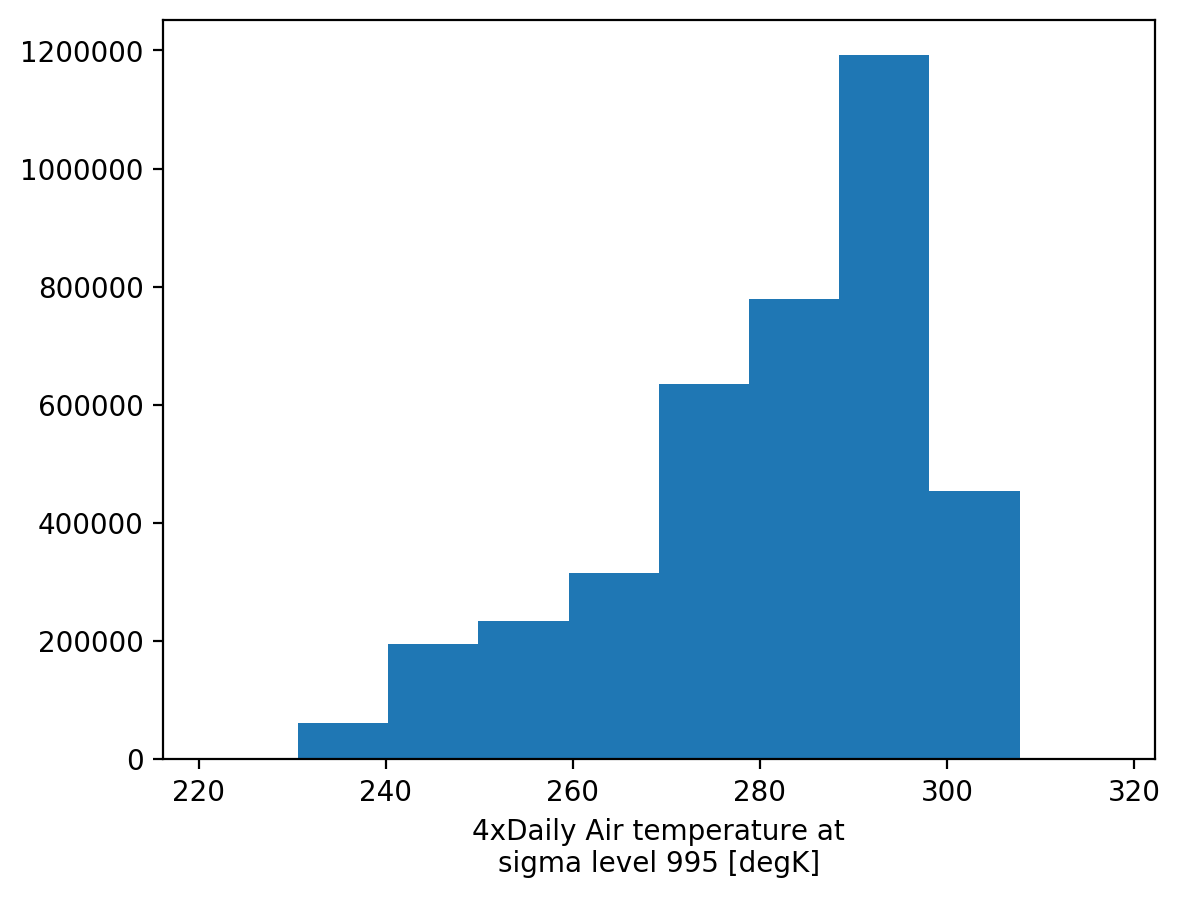

In [28]:
atg.Tair.plot()

Eje X: valores únicos o rango de valores en Tair    
Eje Y: cantidad de veces que ese valor aparece   

## Plots 1D
También se puede tomar una coordenada y plotear sobre ella.

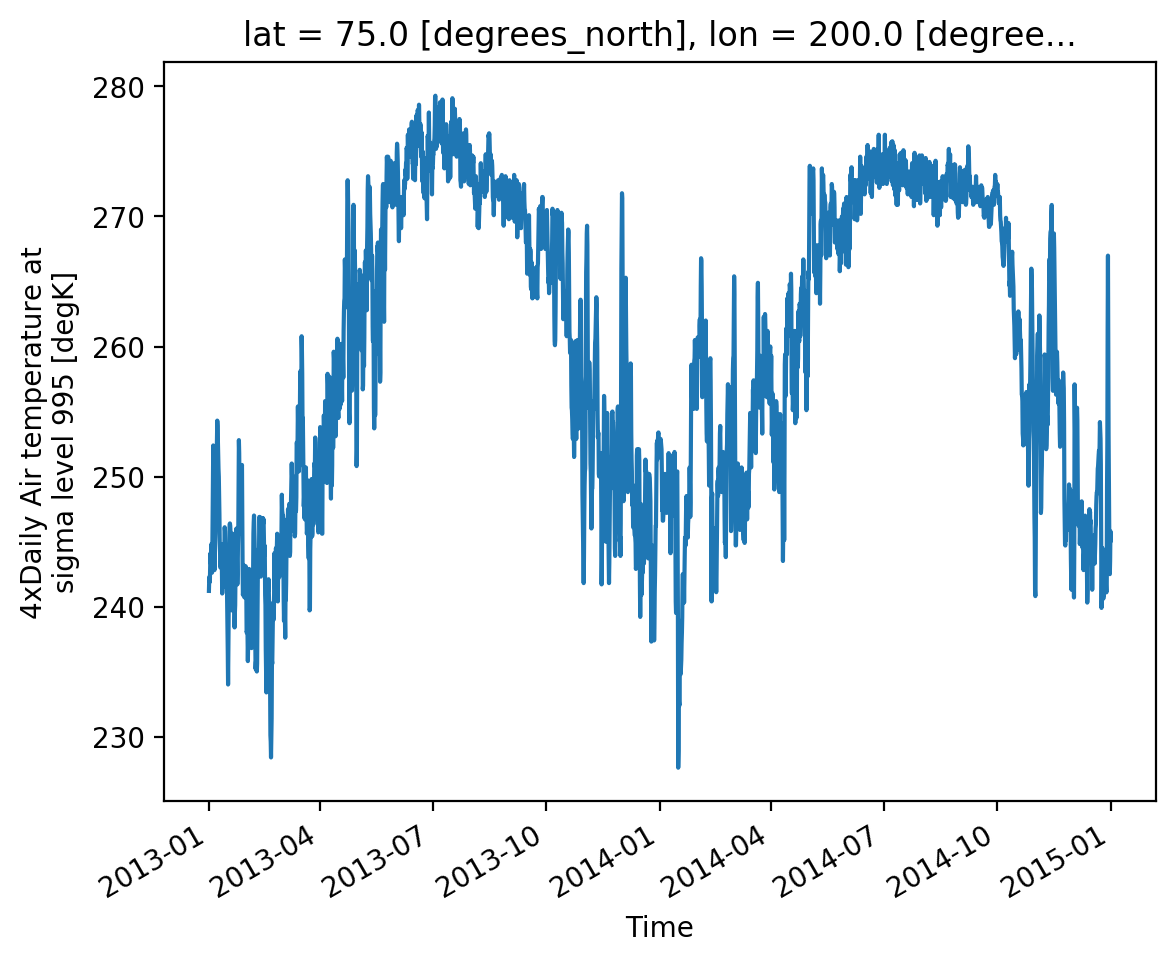

In [29]:
atg.Tair.isel(lat=0, lon=0).plot()

## Plots 2D
Notar la información que nos da los `attr`

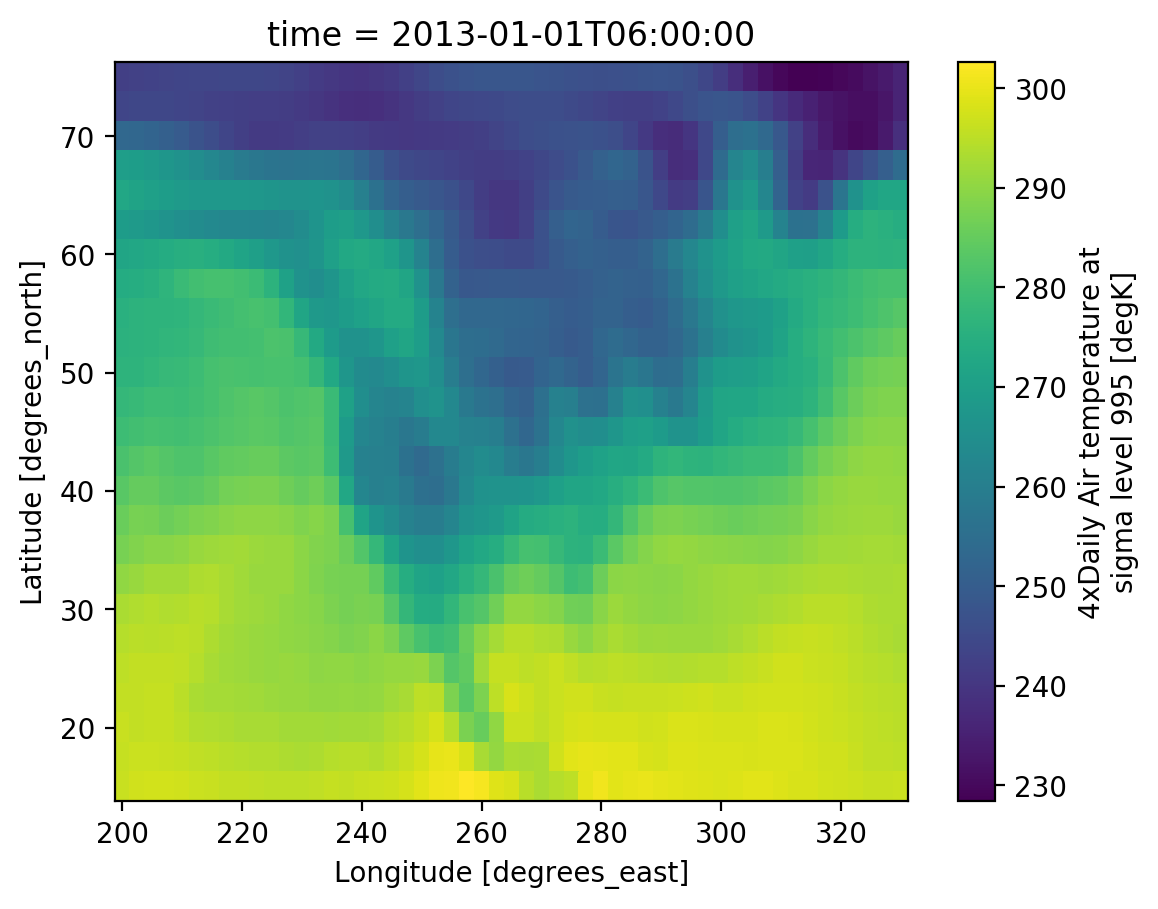

In [30]:
atg.Tair.isel(time=1).plot()

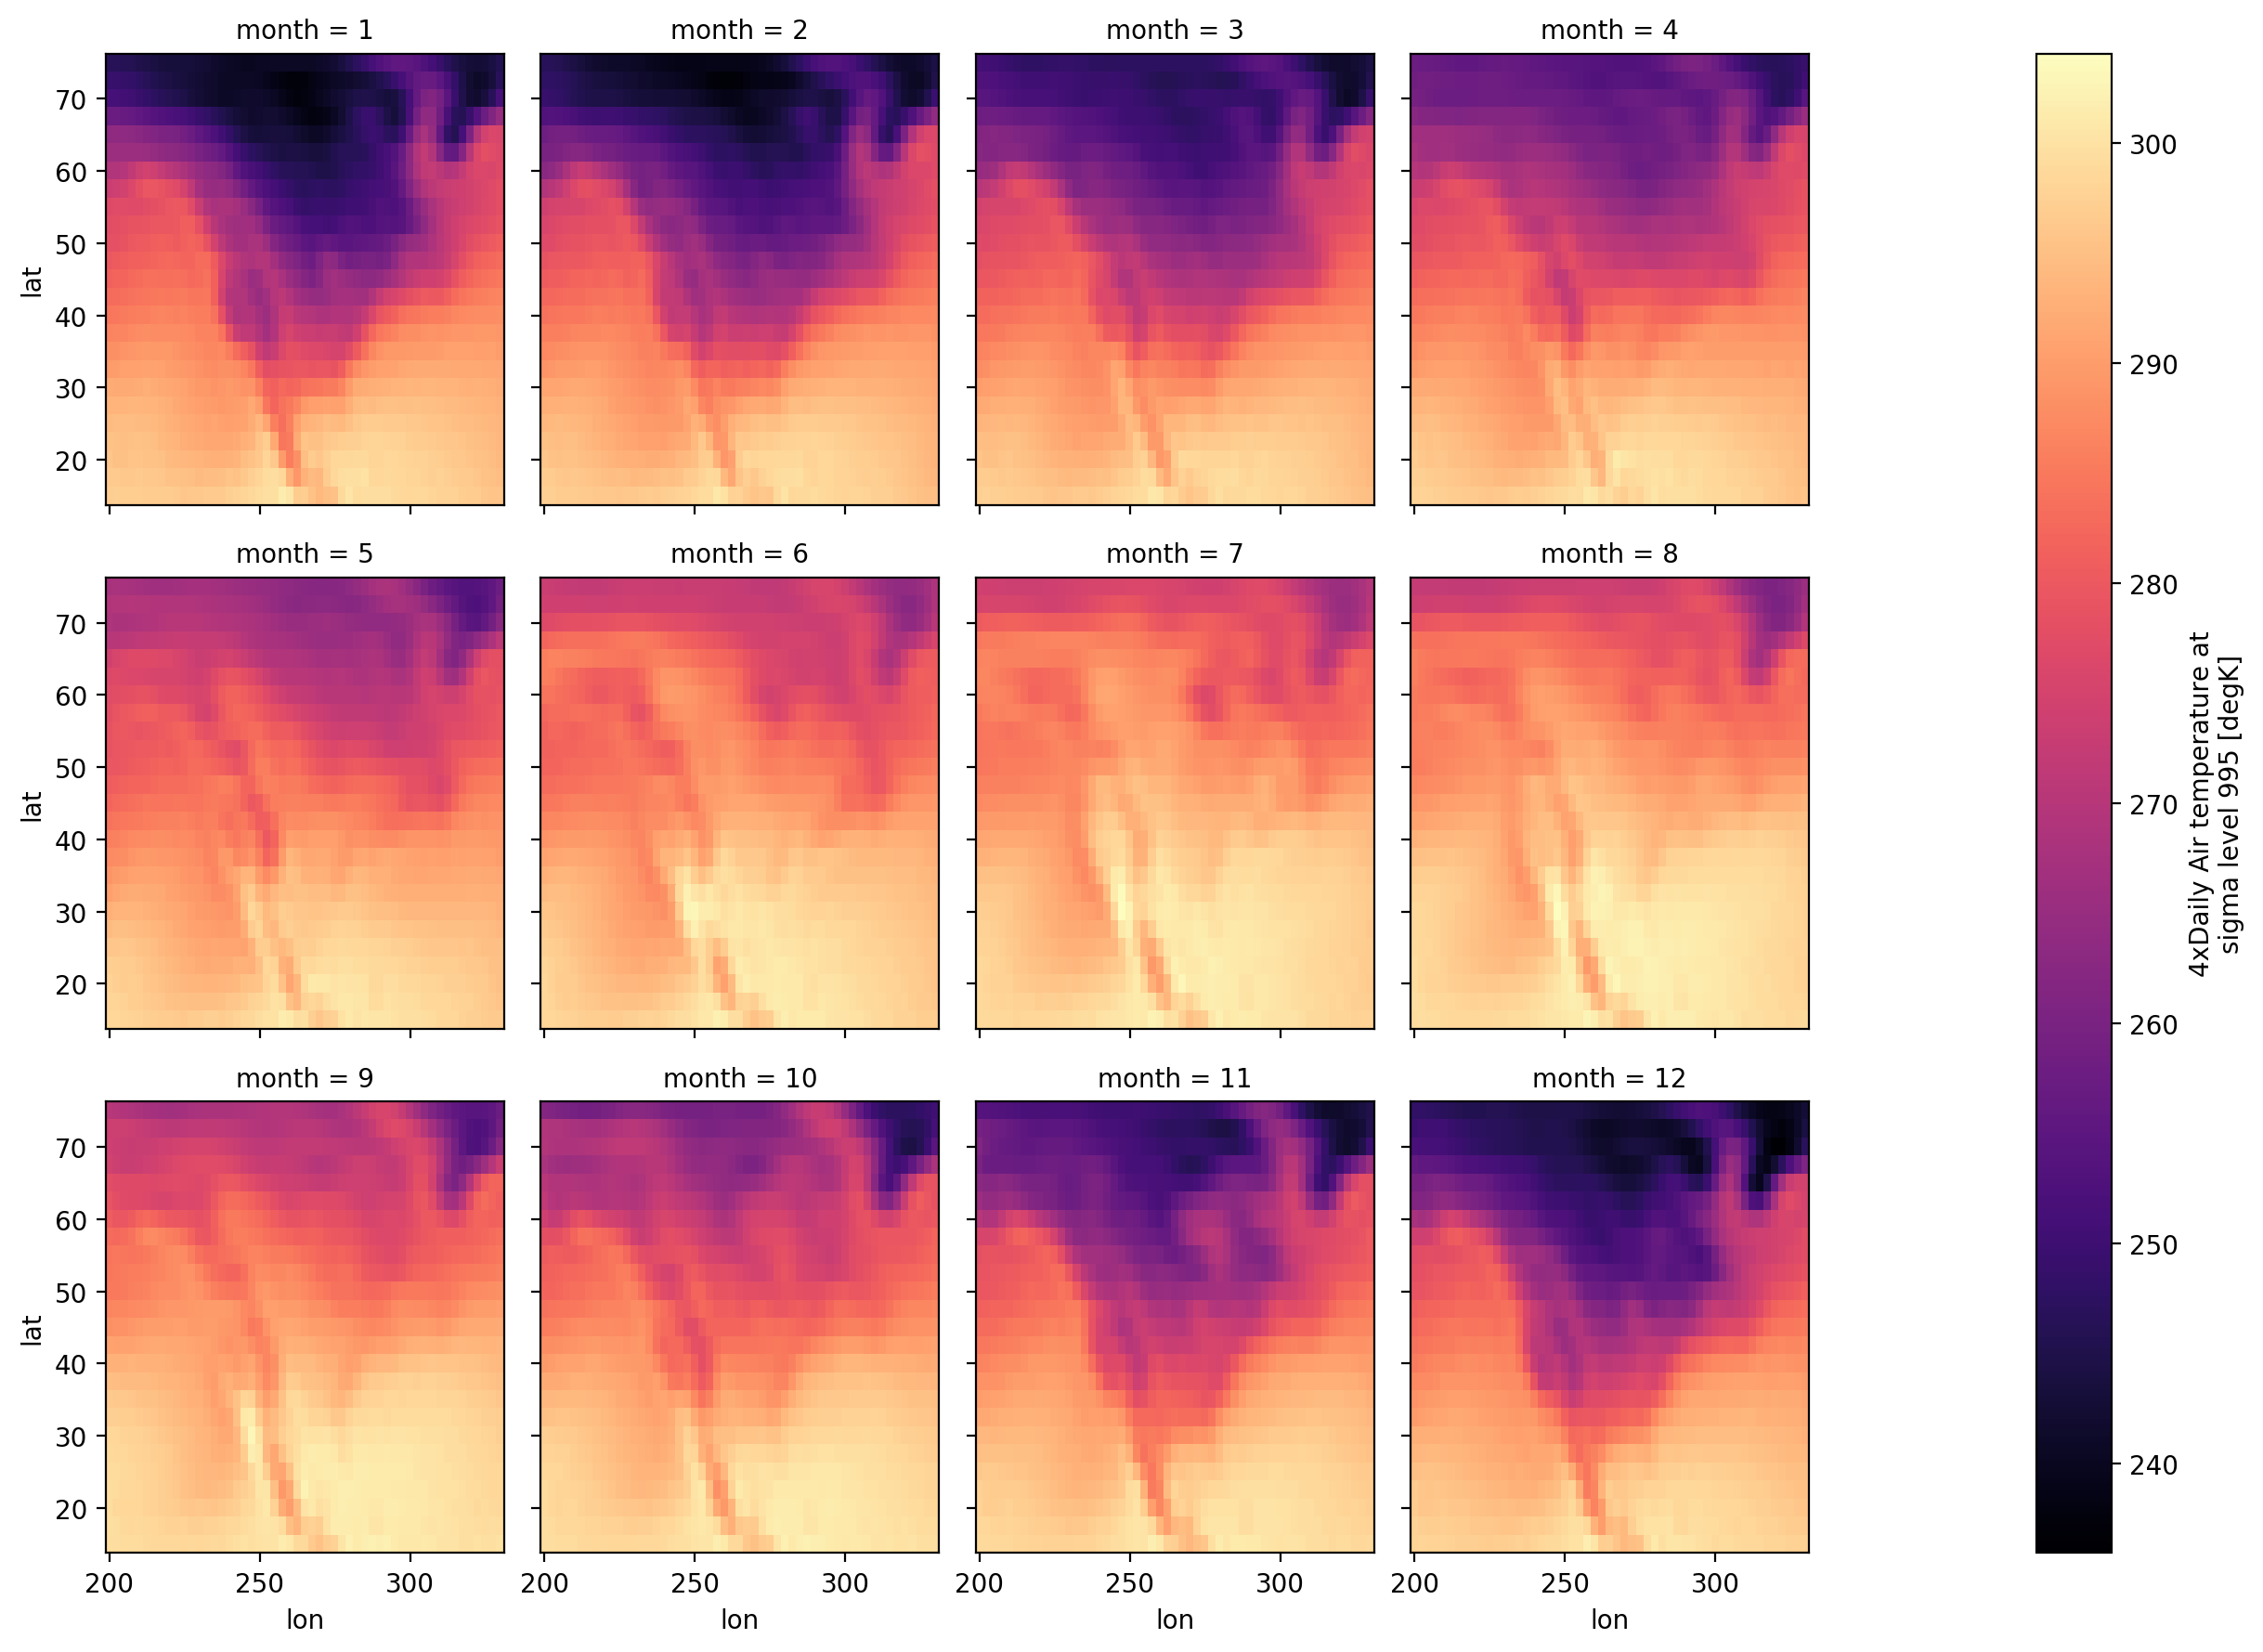

In [31]:
# acá el código de verdad así no se muestra la figura en la slide
monthly_means = atg.groupby("time.month").mean()
fg = monthly_means.Tair.plot(
    col="month",
    col_wrap=4,
    # estética del plot, igual que en matplotlib
    cmap=mpl.cm.magma,
    cbar_kwargs= {
        "pad": 0.1,
    }
)

## Plot 3D
**Faceting** Con esto generemos subplots distribuídos en grilla para representar más dimensiones.    
Para "facetear" lo más sencillo es especificar una columna/fila (que es el nombre de una dimensión).


```py
monthly_means = atg.groupby("time.month").mean()
fg = monthly_means.Tair.plot(
    col="month",
    col_wrap=4,
    # estética del plot, igual que en matplotlib
    cmap=mpl.cm.magma,
    cbar_kwargs= {
        "pad": 0.1,
    }
)
```
el objeto fg (de tipo FacetGrid) es útil porque
- con fg.fig vemos la figura
- podés modificar los ejes con fg.axes y los labels de los ejes (fg.set_xlabels / fg.set_ylabels )

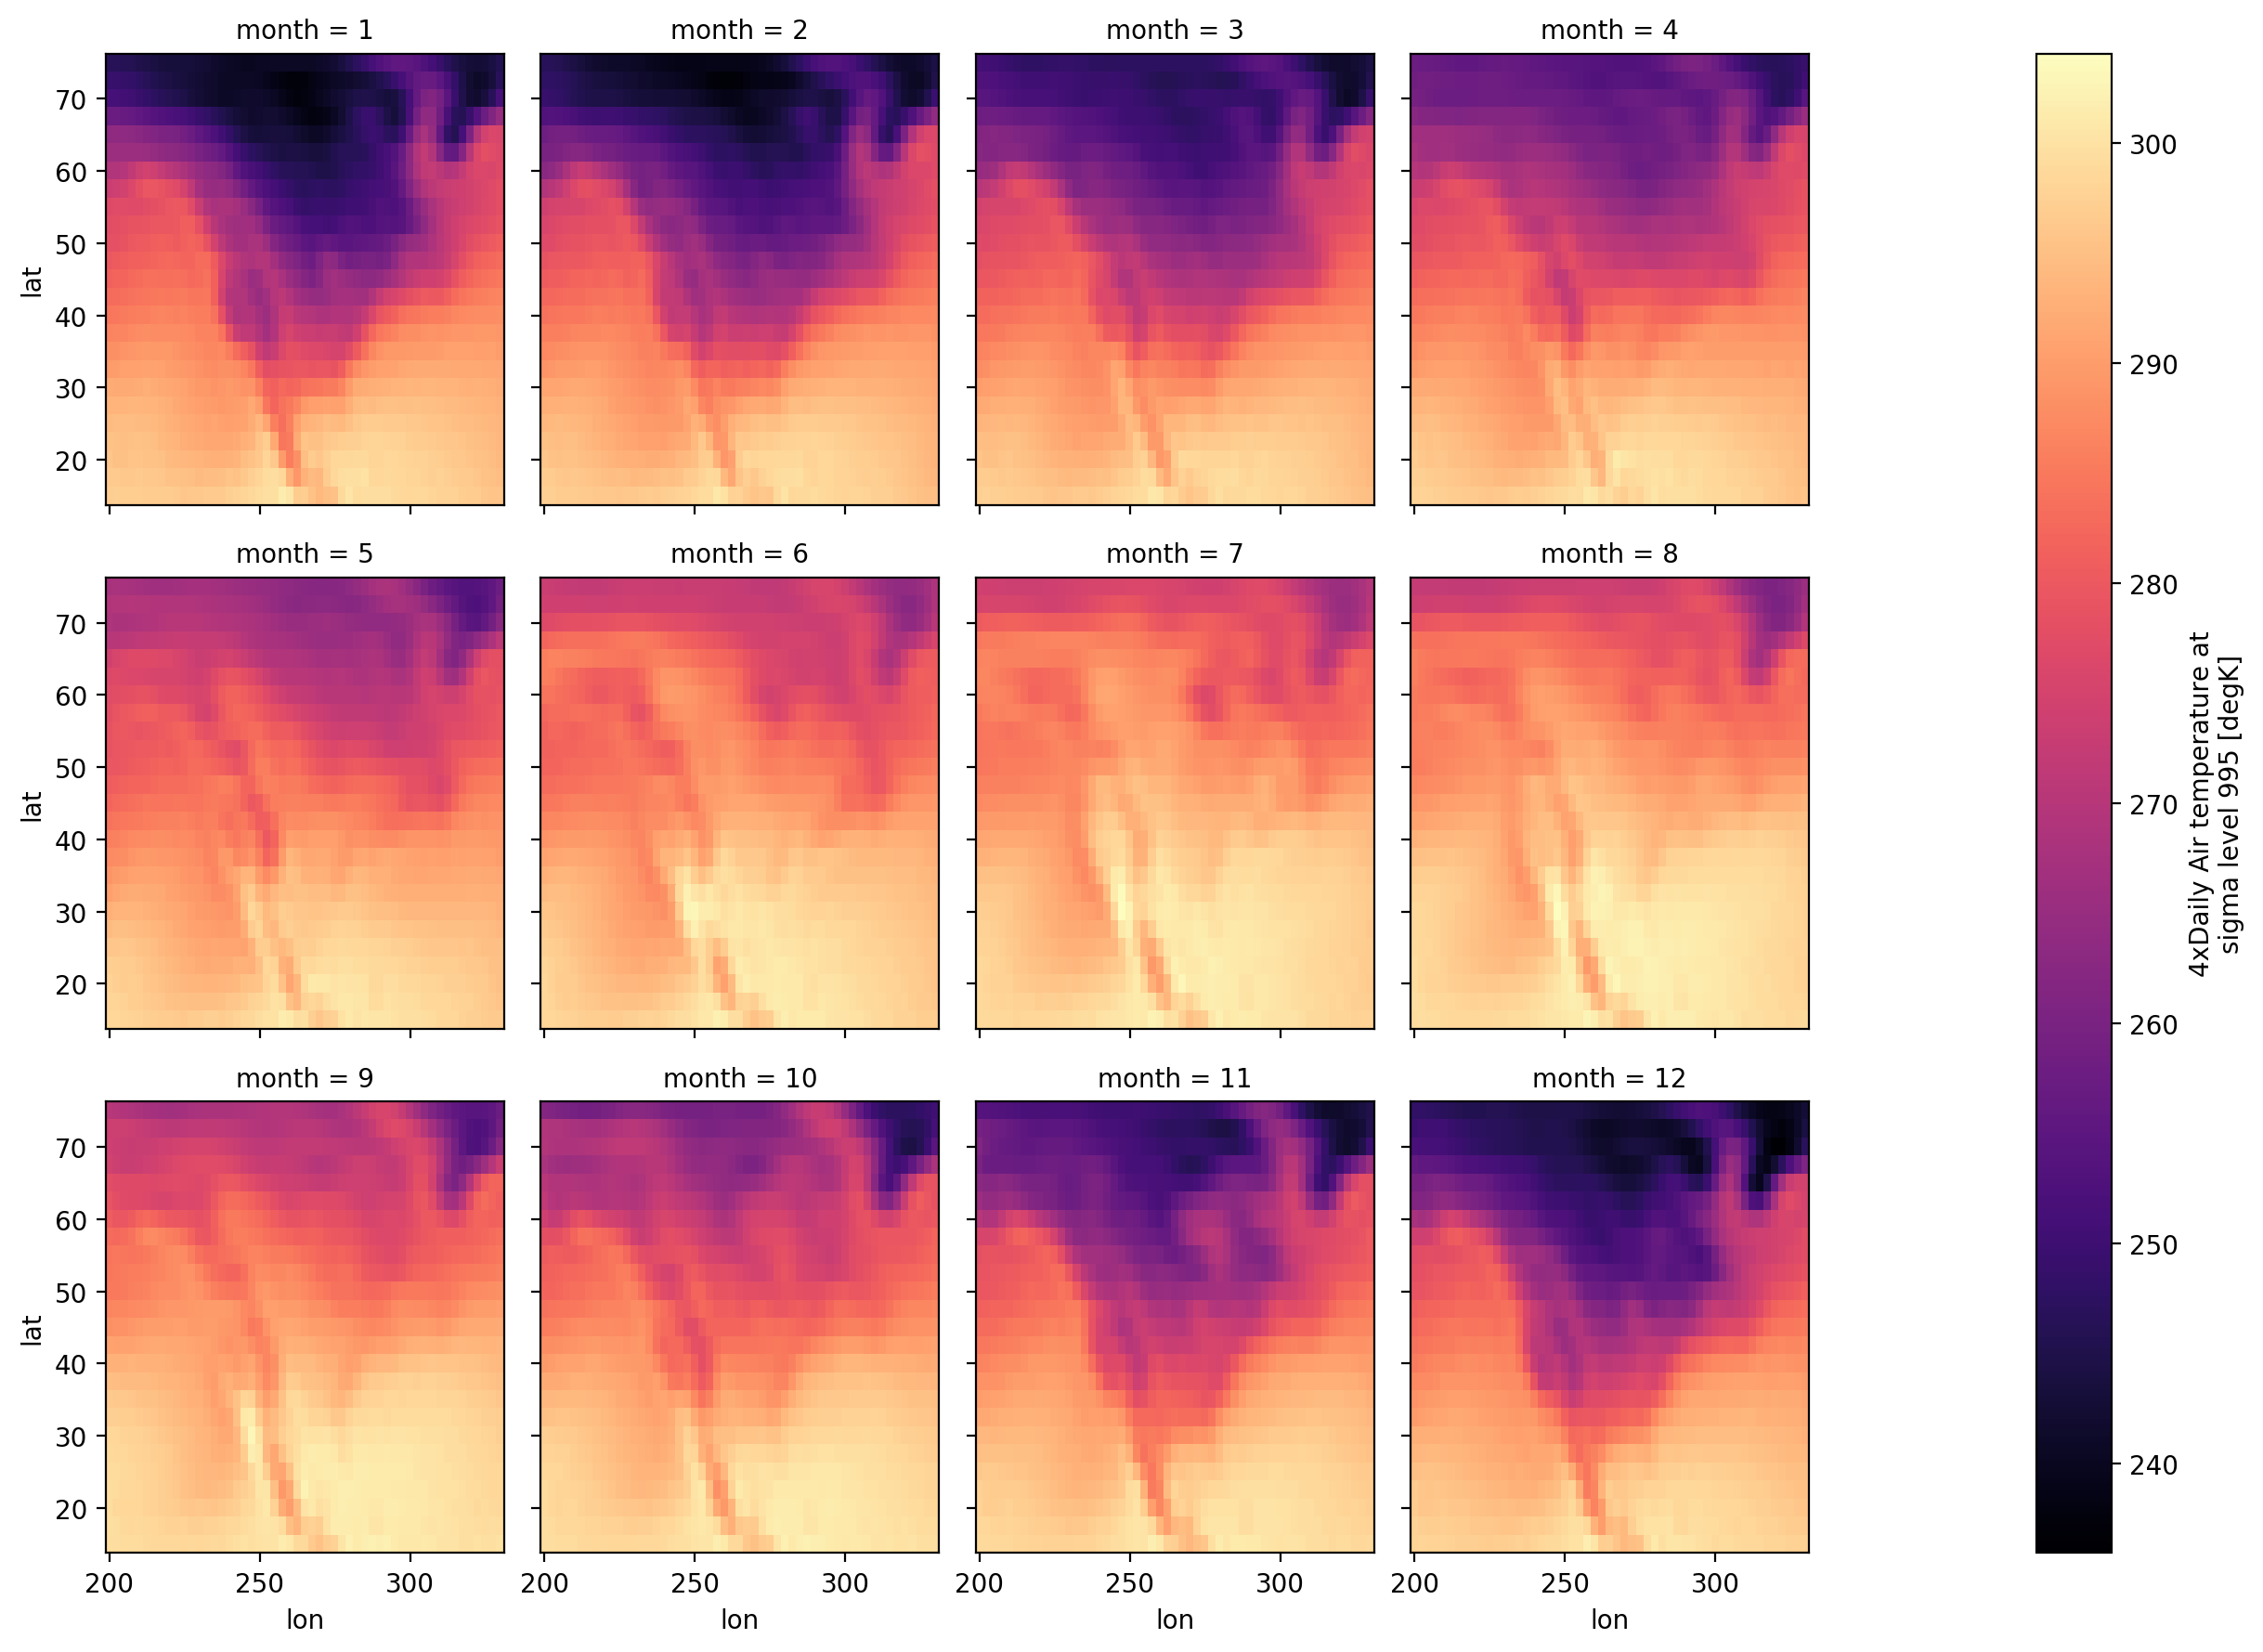

In [32]:
fg.fig

Al facetear podés personalizar aún más tus gráficos:

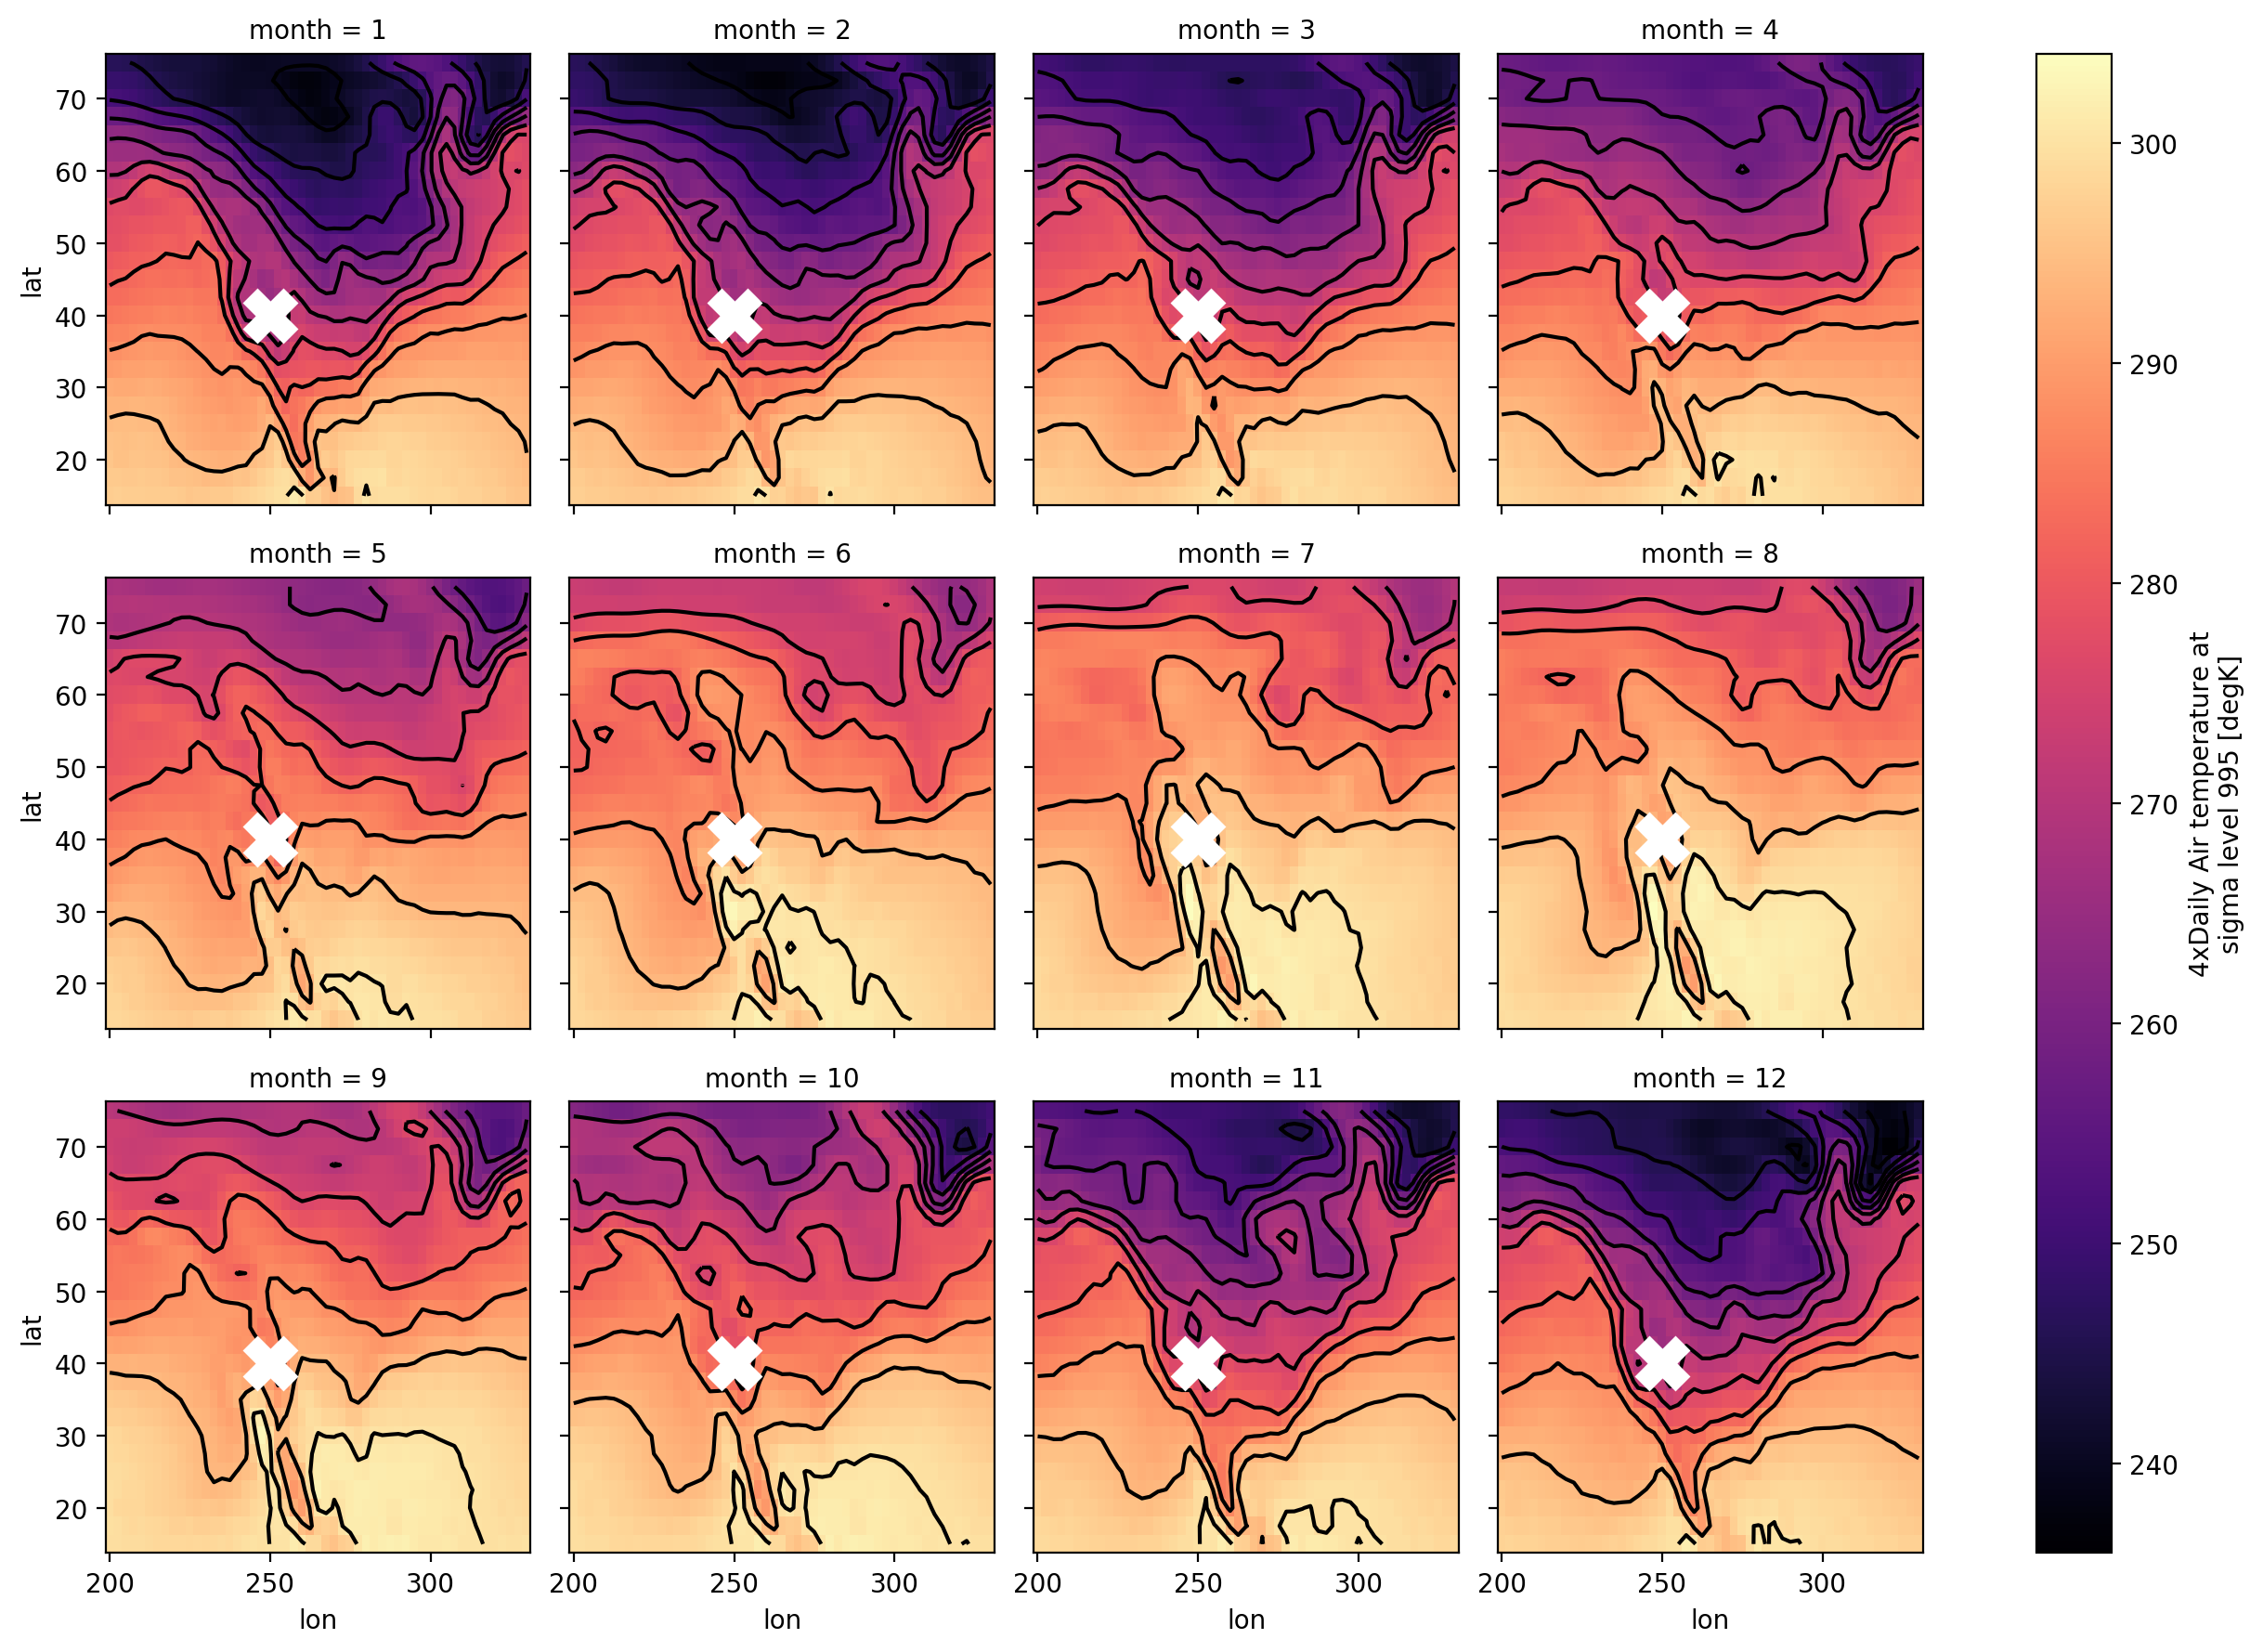

In [33]:
fg2 = monthly_means.Tair.plot(col="month",col_wrap=4,cmap=mpl.cm.magma)
fg2.map_dataarray(xr.plot.contour, x="lon", y="lat", colors="k", levels=13, add_colorbar=False)
fg2.map(lambda: plt.plot(250, 40, markersize=20, marker="X", color="w"))

### 🌎 Cartopy 
¡Mapas!
```py
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Orthographic(-90, 30)))
ds.Tair.isel(time=1).plot(ax=axis, transform=ccrs.PlateCarree(), cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},robust=True)
axs.coastlines()  # cartopy 
```
<img src="images/cartopy.png" width="600">

## Plot intercativos: hvplot
Funciones simliares a plot:
(pero ya notamos diferencias 😉)

In [34]:
atg.Tair.hvplot()

:NdOverlay   [Variable]
   :Histogram   [Tair]   (Tair_count)

### 2d?...

In [35]:
atg.Tair.hvplot(groupby="time",clim=(250,300))

:DynamicMap   [time]
   :Image   [lon,lat]   (Tair)

### Animaciones
Muy simples

In [36]:
atg.Tair.hvplot(groupby="time",clim=(250,300), # igual que antes
    widget_type="scrubber",
    widget_location="bottom"
)

Column
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='bottom', widget_type='scrubber', width=700)
    [1] WidgetBox(align=('center', 'end'))
        [0] Player(end=2919, width=550)